<a href="https://colab.research.google.com/github/ridaouiafaf/diabetes_prediction_model/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: Predict if a person is diabetic (1) or not (0) based on medical measurements.

Type: Binary Classification

Evaluation Metric: Accuracy, F1-score, ROC AUC

Link to dataset: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

**Problem detected:**

In real-world healthcare data:

Blood pressure = 0 is not physiologically possible for a living person.

Similarly, Glucose, BMI, Skin Thickness, Insulin = 0 are usually indicators of missing or improperly recorded data, not actual values.

So, for 0s in these columns; it's missing data, not a genuine zero.

**Solution:**

=> Replace Zeros with Mean/Median (Imputation), recommended for healthcare datasets where losing data is costly.

**Data cleaning & Preprocessing:**

In [6]:
import numpy as np

for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
  df[col]=df[col].replace(0,np.nan)


df.fillna(df.mean(), inplace=True)
# .mean() ignores missing values (NaN), not zeroes.
# So we need to convert invalid zeroes into NaN first, otherwise .mean() will calculate the wrong average (including those invalid zeroes).

In [7]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  

**Data Visualization:**

In [8]:
import seaborn as sns #Stylish, statistical visualizations
import matplotlib.pyplot as plt #Needed for showing or customizing plots

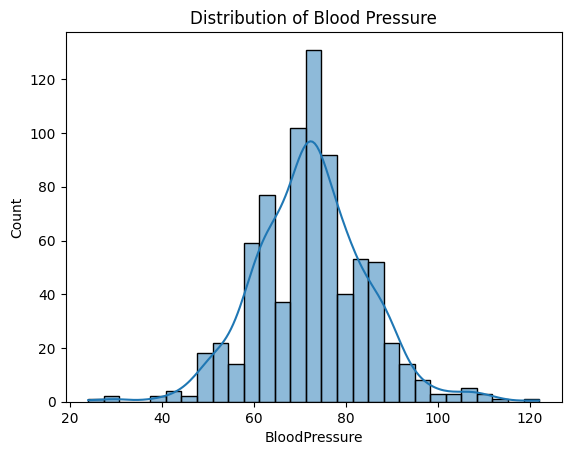

In [9]:
sns.histplot(data=df, x='BloodPressure',kde=True)
#histplot() → Draws a histogram (distribution) of BloodPressure
#kde=True → Adds a smooth curve to show the density estimate
plt.title("Distribution of Blood Pressure")
plt.show()
#  theory behind this statistical distribution : https://www.youtube.com/watch?v=oI3hZJqXJuc

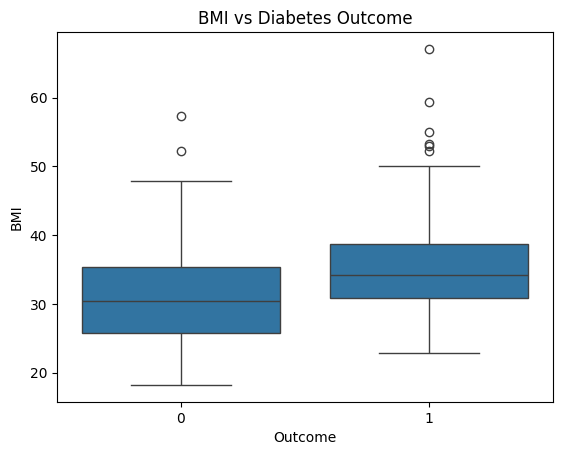

In [10]:
sns.boxplot(x='Outcome',y='BMI',data=df) # boxplot = box and whisker plot
plt.title("BMI vs Diabetes Outcome")
plt.show()
# theory behind it undertood it on : https://www.youtube.com/watch?v=fHLhBnmwUM0

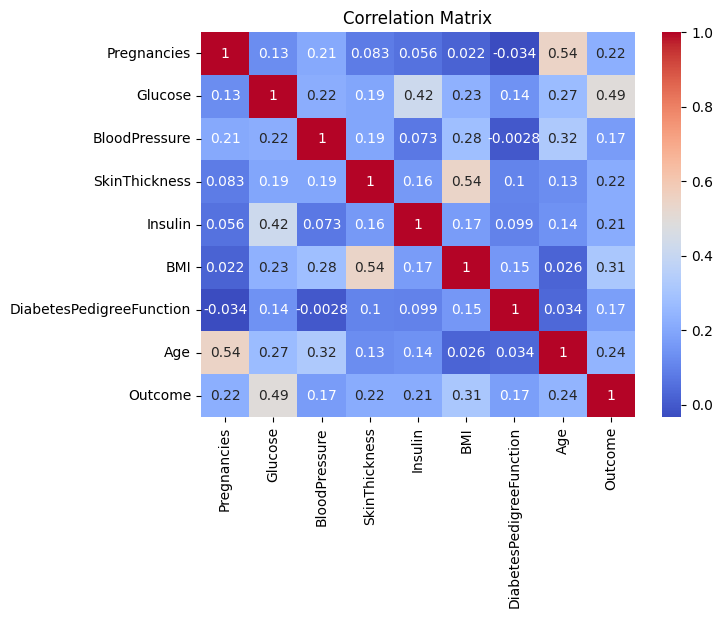

In [12]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
# This one shows how strongly a feature is related to diabetes (Outcome).

**Data Preparing:**

In [13]:
from sklearn.preprocessing import StandardScaler #StandardScaler comes from sklearn.preprocessing and will normalize the features.

X = df.drop('Outcome',axis=1)
# This removes the Outcome column, because it is what we wanna predict. axis=1 → Means “drop a column” (not a row).

y = df['Outcome']

scaler = StandardScaler() #This creates a scaling tool which will normalize the features so that each column will have mean = 0 and std dev = 1

X_scaled = scaler.fit_transform(X)

**Splitting Data into Train/Test:**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

🔹 Parameters explained:
**test_size=0.2**
This means: 20% of the data will go into the test set, and 80% into the training set.

💡 Common values are:

0.2 (80% train / 20% test) ← ⭐️ Most used

0.3 (70% train / 30% test)

You can adjust this depending on your dataset size. For example, if you have a lot of data, even 10% might be enough for testing.

**random_state=42**
This is just a seed number for the random split.

It ensures reproducibility — so every time you run the code, you get the same split.

You can set this to any number, like 1, 42, 2025 — it doesn’t matter. But if you want to repeat your experiments or share your code, keep it fixed.

📌 Without setting random_state, every run will give a different train/test split, and your model’s performance might vary slightly.

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [16]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

y_pred = model.predict(X_test) # uses the trained logistic regression model to make predictions on unseen data

print(confusion_matrix(y_test,y_pred)) # prints confusion matrix, which helps evaluate classification performance.
print(classification_report(y_test,y_pred)) # gives a full breakdown of metrics
print("ROC AUC Score:", roc_auc_score(y_test,model.predict_proba(X_test)[:,1])) # gives probabilities for class 1

[[82 17]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC AUC Score: 0.8242424242424242


✅**Confusion Matrix layout:**

                
                   |(predicted) 0    1
        -------+--------
        
       |  (actual)         0   | TN  FP

       |  (actual)         1   | FN  TP


TN (True Negative): predicted 0, actually 0

TP (True Positive): predicted 1, actually 1

FP (False Positive): predicted 1, actually 0

FN (False Negative): predicted 0, actually 1

✅**Metrics:**

Precision → How many predicted 1s were actually 1

Recall (Sensitivity) → How many actual 1s did we correctly catch

F1-score → Balance between precision & recall

Accuracy → How many total predictions were correct

✅**Probabilities:**

model.predict_proba(X_test) → gives probabilities for both classes:

Column [:,0] → prob. for class 0

Column [:,1] → prob. for class 1 (e.g., having diabetes)

roc_auc_score(y_test, probs) → gives the ROC AUC which measures how well the model separates the two classes. Range: 0.5 (random guessing) → 1.0 (perfect separation)

Ours got 0.82 which means he separates the two classes very well ;).